# GRIP - THE SPARKS FOUNDATION¶

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP (BATCH June-2021)

# Task no 2 : Prediction using Unsupervised ML

Objective: To predict the optimum number of clusters and represent it visually using K-Means Algorithim.¶





 ## Author: Amogh Kulkarni

In [2]:
# Importing the required Library for data analysis and visualation.

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import style


In [3]:
##Importing & Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported sucessfully")

iris_df.head(10)


Data imported sucessfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
# Getting information about the dataset

iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Checkinging for Null-values in data-set

iris_df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

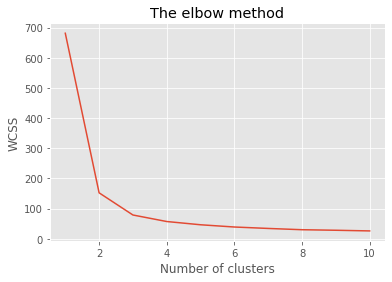

In [6]:
# WCSS is the sum of squared distance between each point and the centroid in a cluster.
#When we plot the WCSS with the K value, the plot looks like an Elbow.
#As the number of clusters increases, the WCSS value will start to decrease.
#WCSS value is largest when K = 1.
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    
# Plotting the results onto a line graph, 
style.use('ggplot')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


### Optimum cluster is where the elbow occures.This is when the WCSS doesn't decrease significantly with every iteration. Here we see that after 3rd iteration decrease in WCSS is very less compared to 1st and 2nd iteration¶


 ### So here 3 is the optimum value for the clusters

In [7]:
# Applying kmeans to the dataset
# K-Means Clustering is a concept that falls under Unsupervised Learning.
# This algorithm can be used to find groups within unlabeled data.

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


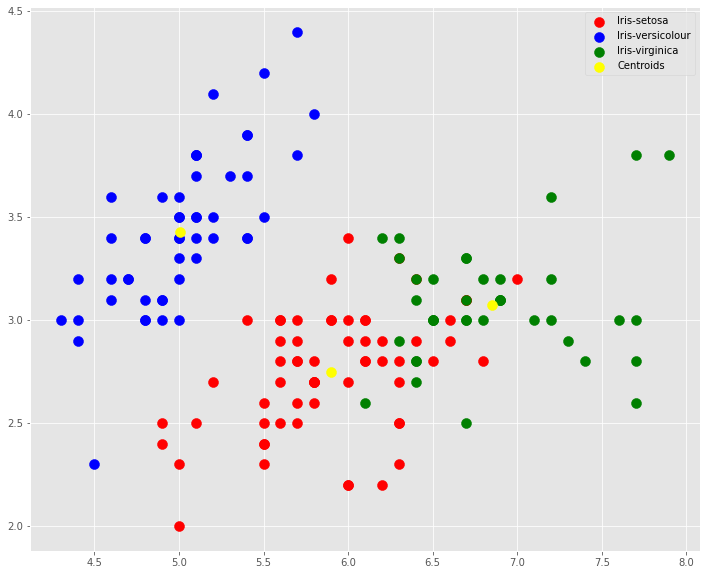

In [10]:
# Visualising the clusters

plt.figure(figsize=(12,10))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

####                                                            THANK-YOU